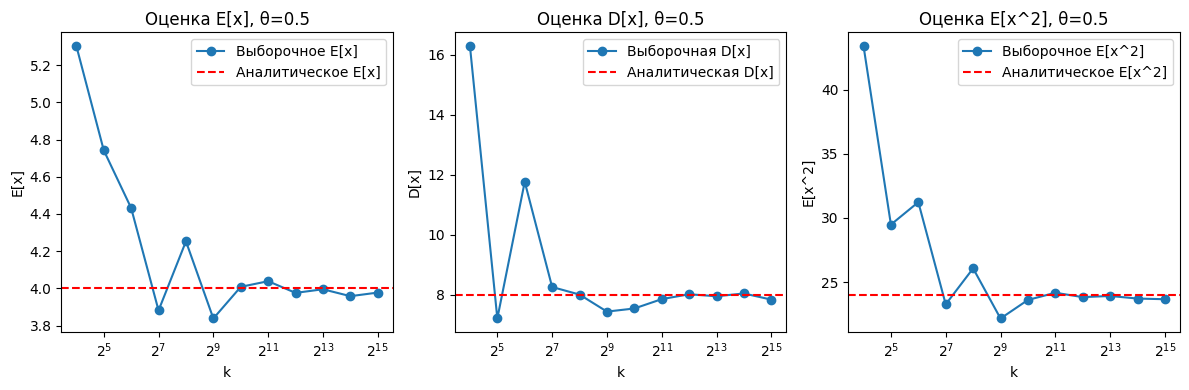

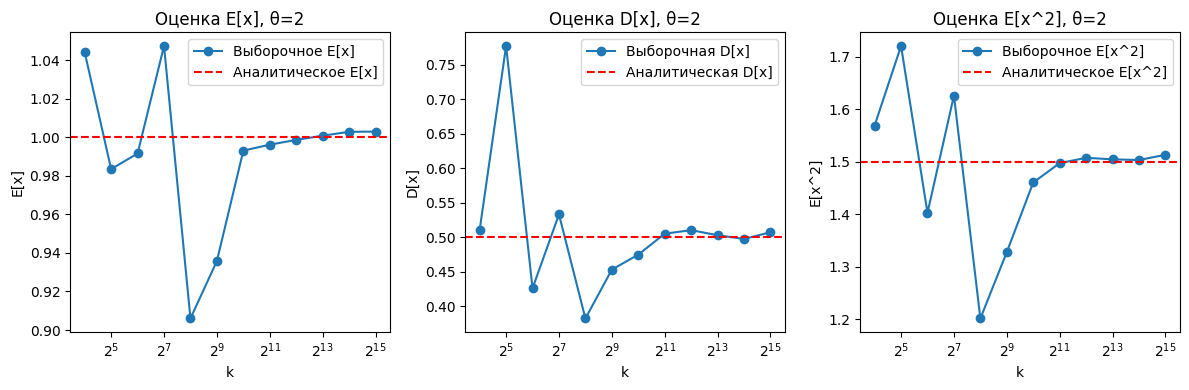

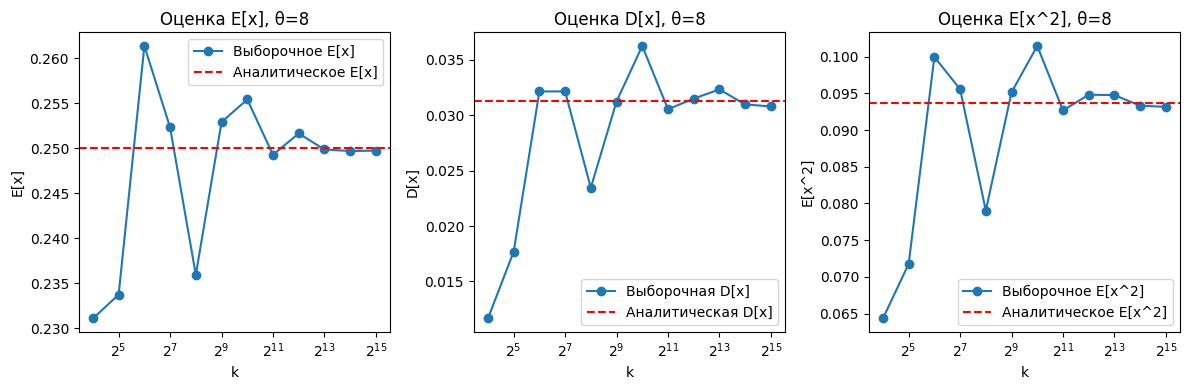

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

thetas = [0.5, 2, 8]
k_values = 2 ** np.arange(4, 16) 

for theta in thetas:
    dist = sps.gamma(a=2, scale=1/theta)
    
    E_analytical = dist.mean()
    D_analytical = dist.var()
    E2_analytical = dist.moment(2)

    E_estimates = []
    D_estimates = []
    E2_estimates = []
    
    for k in k_values:
        sample = dist.rvs(size=k)
        E_estimates.append(np.mean(sample))
        D_estimates.append(np.var(sample, ddof=1))
        E2_estimates.append(np.mean(sample**2))
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(k_values, E_estimates, marker='o', label='Выборочное E[x]')
    plt.axhline(E_analytical, color='r', linestyle='--', label='Аналитическое E[x]')
    plt.xlabel('k')
    plt.ylabel('E[x]')
    plt.xscale('log', base=2)
    plt.legend()
    plt.title(f'Оценка E[x], θ={theta}')
    
    plt.subplot(1, 3, 2)
    plt.plot(k_values, D_estimates, marker='o', label='Выборочная D[x]')
    plt.axhline(D_analytical, color='r', linestyle='--', label='Аналитическая D[x]')
    plt.xlabel('k')
    plt.ylabel('D[x]')
    plt.xscale('log', base=2)
    plt.legend()
    plt.title(f'Оценка D[x], θ={theta}')
    
    plt.subplot(1, 3, 3)
    plt.plot(k_values, E2_estimates, marker='o', label='Выборочное E[x^2]')
    plt.axhline(E2_analytical, color='r', linestyle='--', label='Аналитическое E[x^2]')
    plt.xlabel('k')
    plt.ylabel('E[x^2]')
    plt.xscale('log', base=2)
    plt.legend()
    plt.title(f'Оценка E[x^2], θ={theta}')
    
    plt.tight_layout()
    plt.show()
